In [34]:
import os
import pandas as pd
import seaborn as sns

In [38]:
sns.set(rc={'figure.figsize':(16,10)})

# Задание 1

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [2]:
path_to_file = '../jupyter-a-hudjakov-21/shared/homeworks/python_ds_miniprojects/4/data/'

In [3]:
list_date = os.listdir(path_to_file)

In [4]:
list_date

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [5]:
os.listdir(path_to_file)

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [49]:
df = pd.DataFrame(columns=['product_id','quantity','name','date'])

In [7]:
len_part_path_1 = 83

In [8]:
len_part_path_2 = 9

In [9]:
len_part_path_3 = 72

In [50]:
for i in list_date:
    for j in os.listdir(path_to_file+i):
        temp_path = path_to_file+i+'/'+j +'/' + os.listdir(path_to_file+i+'/'+j)[0]
        temp_df = pd.read_csv(temp_path, index_col=0)
        temp_df['name'] = temp_path[len_part_path_1 : -len_part_path_2]
        temp_len = len(temp_path[len_part_path_1 : -len_part_path_2])
        temp_date = temp_path[72:-(temp_len+9 + 1)]
        temp_df['date'] = temp_date
        df = df.merge(temp_df, how='outer')

In [51]:
df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [78]:
df.quantity.sum()

480

# Задание 2

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [20]:
max_buy = df.groupby(['name']).agg({'quantity':'sum'}).max()[0]

In [26]:
max_buyers = df.groupby(['name'],as_index=False).agg({'quantity':'sum'}).query("quantity == @max_buyer").name.to_list()

In [27]:
max_buyers

['Alexey_Smirnov', 'Petr_Smirnov']

# Задание 3

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 

Сколько было продано единиц товара с product_id==56?

In [32]:
top_product_id = df.groupby(['product_id'],as_index=False).agg({'quantity':'sum'}).sort_values(['quantity'], ascending=False).iloc[:10]

In [33]:
top_product_id

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


# Задание 4

Визуализируйте продажи по дням.

In [52]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df['weekday'] = df['date'].dt.strftime('%A')

In [81]:
quantity_per_day = df.groupby(['date'], as_index=False).agg({'quantity':'sum'}).sort_values(['date'])

In [82]:
quantity_per_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


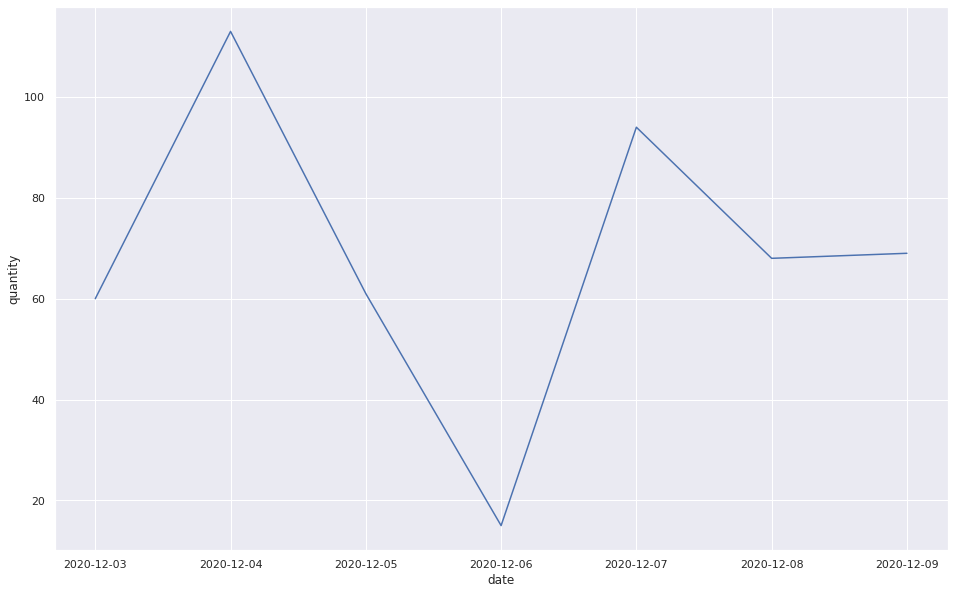

In [84]:
sns.lineplot(data=quantity_per_day, x='date', y='quantity')

# Задание 5

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 

Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [86]:
temp_df = df.drop_duplicates(subset=['product_id','name','date'])

In [87]:
temp_df

,product_id,quantity,name,date,weekday
0,27,4,Petr_Ivanov,2020-12-05,Saturday
1,89,1,Petr_Ivanov,2020-12-05,Saturday
2,33,2,Petr_Ivanov,2020-12-05,Saturday
3,8,3,Petr_Ivanov,2020-12-05,Saturday
4,16,1,Petr_Ivanov,2020-12-05,Saturday
...,...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07,Monday
157,94,4,Petr_Fedorov,2020-12-07,Monday
158,95,2,Vasiliy_Ivanov,2020-12-07,Monday
159,83,3,Vasiliy_Ivanov,2020-12-07,Monday


In [89]:
temp_df.groupby(['name','product_id']).agg({'date':'count'}).query("date>1")

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
